# 注意事項
- notebookと同じディレクトリにannotation_koma_mergeを配置
- 駒の種類ごとに，train:test = 7:3 に分割

In [1]:
import numpy as np
import pickle
import glob
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from zipfile import ZipFile
import os

from PIL import Image
import matplotlib.pyplot as plt
# plt.style.use('dark_background') # jupyterの背景を黒くしている場合， 混同行列などの軸ラベルが見やすくなる．
% matplotlib inline

## データ数の分布の確認

<Container object of 14 artists>

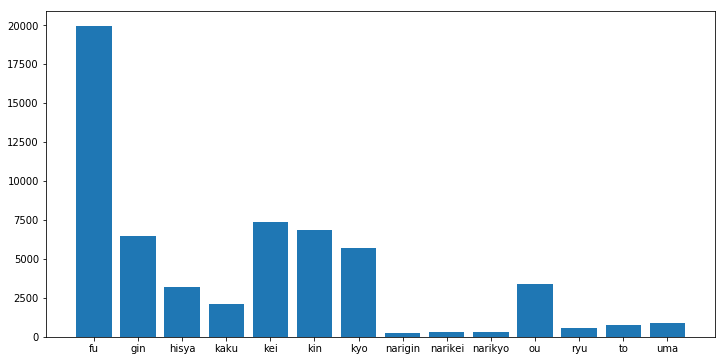

In [2]:
# 画像が存在するディレクトリ
img_dir = "../dataset/image/annotation_koma_merge/"

# 駒の種類
class_names = ["fu", "gin", "hisya", "kaku", "kei", "kin", "kyo", "narigin", "narikei", "narikyo", "ou", "ryu", "to", "uma"]

# 駒の種類ごとの画像数を格納
counts= []

for _, class_name  in enumerate(class_names):
    # データ数を格納
    count = len(glob.glob(img_dir + class_name + "/*"))
    counts.append(count)

plt.figure(figsize = (12, 6))
plt.xticks(range(len(counts)), class_names)
plt.bar(range(len(counts)), counts) #, color="blue")

## データセットの作成

In [9]:
class load_data():
    def __init__(self):
        self.data = [] # 画像を格納するlist．後にarrayに変換．
        self.target = [] # ラベルを格納するlist．後にarrayに変換．
        self.target_names = np.array(["fu", "gin", "hisya", "kaku", "kei", "kin", "kyo", "ou"]) # 成り駒以外の8種類
        self.main()
        
    # zipファイルを， zipファイルが存在するディレクトリで展開する関数
    def extract_zip(self, dir_path, file_name): # dir_path：zipファイルが存在するディレクトリへのパス， file_name：zipファイルの名前
        with ZipFile(dir_path + file_name, "r") as z:
            z.extractall(dir_path)
        
    # pickleファイルのデータを返す関数
    def load_pickle(self, path): # path：pickleファイルへのパス
        with open(path, "rb") as f:
            return  pickle.load(f)
            
    # pickle化する関数
    def dump_pickle(self, path, data): # path：作成するpickleファイルへのパス， data：pickle化するデータ
        with open(path, "wb") as f:
            pickle.dump(data, f)

    # 生データからデータセットを作る関数(trainとtestの分け方はランダム)
    def make_dataset(self, size=(64, 80)):
        
        # 生データが存在するディレクトリへのパス
        dir_path = "../dataset/image/annotation_koma_merge/"
        
        # 各クラスごとに， 画像をself.dataに、ラベルをself.targetに格納する。
        for target, target_name in enumerate(self.target_names):
            
            # 画像へのパスを作成
            data_paths = glob.glob(dir_path + target_name + "/*") 

            # 格納
            for data_path in data_paths:
                self.data.append(np.array(Image.open(data_path).resize(size))[:, :, :3]) # 4channel目は無視．
                self.target.append(target)

        # Arrayに変換
        self.data = np.array(self.data)
        self.target = np.array(self.target)
    
    def main(self):
        
        # pickleのzipしかなければ解凍する
        if ("../dataset/pickle.zip" in glob.glob("../dataset/*")) and "../dataset/pickle" not in glob.glob("../dataset/*"):
            self.extract_zip(dir_path="../dataset/", file_name="pickle.zip")
        
        # pickleファイルがあればそこから読み込む
        elif "../dataset/pickle" in glob.glob("../dataset/*"):
            self.data = self.load_pickle("../dataset/pickle/data.pkl")
            self.target = self.load_pickle("../dataset/pickle/target.pkl")
            
        # 生データのzipしかなければ解凍する
        elif ("../dataset/image/annotation_koma_merge.zip" in glob.glob("../dataset/image/*")) and ("../dataset/image/annotation_koma_merge" not in glob.glob("../dataset/image/*")):        
            self.extract_zip(dir_path="../dataset/image/", file_name="annotation_koma_merge.zip")
            
        # 生データからデータセットを作成し， pickle化する
        elif "../dataset/image/annotation_koma_merge" in glob.glob("../dataset/image/*"):
            
            # データセットを作成
            self.make_dataset() 
            
            # pickle化
            os.mkdir(path="../dataset/pickle")
            self.dump_pickle(path="../dataset/pickle/data.pkl", data=self.data) # 画像データpickle化
            self.dump_pickle(path="../dataset/pickle/target.pkl", data=self.target) # ラベルデータをpickle化

        else:
            print("You have no available dataset")

In [11]:
koma = load_data()
x = koma.data
y = koma.target

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (38532, 80, 64, 3)
y_train: (38532,)
x_test: (16515, 80, 64, 3)
y_test: (16515,)
